# **LETS GROW MORE(LGM) VIP INTERNSHIP SEPTEMBER-2021**

# **Prediction using Decision Tree  Algorithm(IRIS DATASET)**

## **By V Yeshwanth**

### **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Loading the Data**

In [ ]:
data_set=pd.read_csv(r'/Iris.csv')

In [ ]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data_set.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


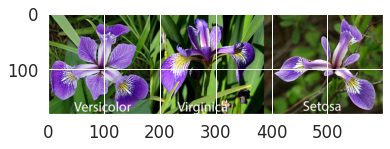

In [28]:
import matplotlib.image as mpimg
img=mpimg.imread("/irises.png")
plt.imshow(img)

### **Data Preprocessing**

In [ ]:
data_set.shape

(150, 6)

In [ ]:
data_set.drop("Id",axis=1,inplace=True)

In [ ]:
data_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Checking for missing values
miss_val = data_set.isna().sum()
miss_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Data Visualization**

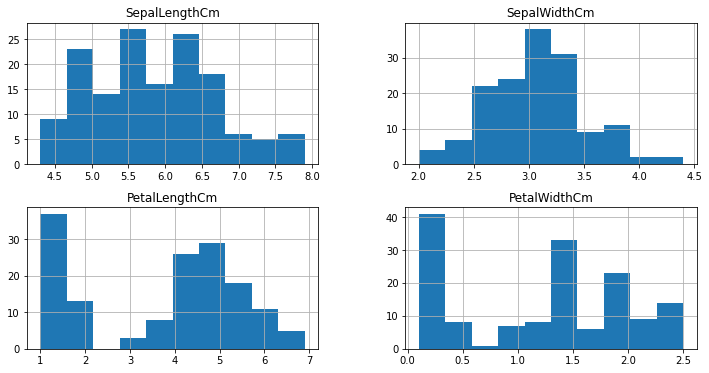

In [ ]:
data_set.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

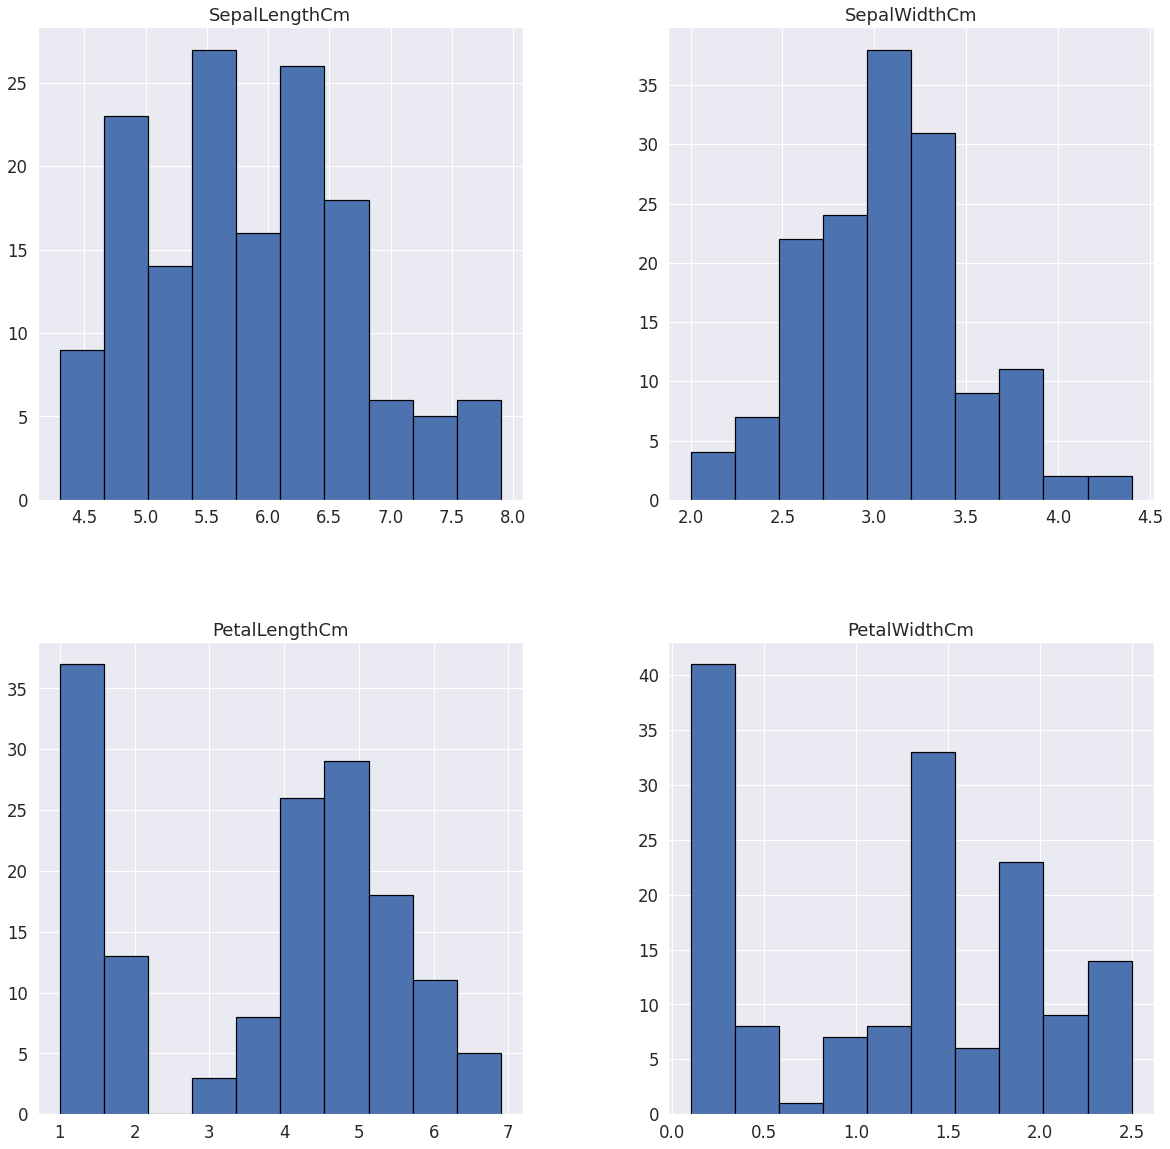

In [ ]:
sns.set(font_scale=1.5)
data_set.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

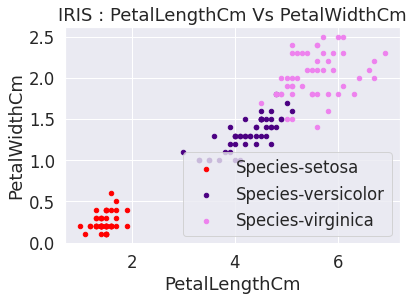

In [ ]:
#scatter Plot
plot=data_set[data_set.Species=="Iris-setosa"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='red',label="Species-setosa")
data_set[data_set.Species=="Iris-versicolor"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='indigo',label="Species-versicolor",ax=plot)
data_set[data_set.Species=="Iris-virginica"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='violet',label="Species-virginica",ax=plot)

plt.title("IRIS : PetalLengthCm Vs PetalWidthCm")
plt.show()

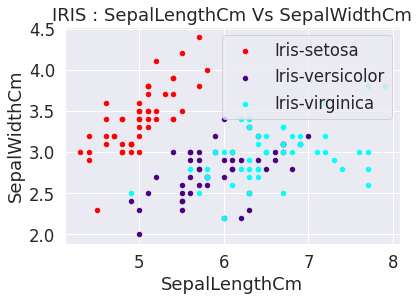

In [ ]:
#Sepal Length vs Sepal Width
plot=data_set[data_set.Species=="Iris-setosa"].plot.scatter(x="SepalLengthCm",y="SepalWidthCm",color='red',label="Iris-setosa")
data_set[data_set.Species=="Iris-versicolor"].plot.scatter(x="SepalLengthCm",y="SepalWidthCm",color='indigo',label="Iris-versicolor",ax=plot)
data_set[data_set.Species=="Iris-virginica"].plot.scatter(x="SepalLengthCm",y="SepalWidthCm",color='cyan',label="Iris-virginica",ax=plot)

plt.title("IRIS : SepalLengthCm Vs SepalWidthCm")
plt.show()

### **Prediction**

In [ ]:
x=data_set.drop("Species",axis=1)
x[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
y=data_set["Species"]
y[0:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
x_train.shape
y_train.shape

(120,)

In [ ]:
x_test.shape
y_test.shape

(30,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pred_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
pred_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred=pred_tree.predict(x_test)

In [ ]:
print(pred[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']
38         Iris-setosa
66     Iris-versicolor
115     Iris-virginica
117     Iris-virginica
89     Iris-versicolor
Name: Species, dtype: object


In [ ]:
#Checking accuracy
from sklearn import metrics

print( "Accuracy: ", str(metrics.accuracy_score(y_test, pred)*100)+"%")

Accuracy:  100.0%


[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue 

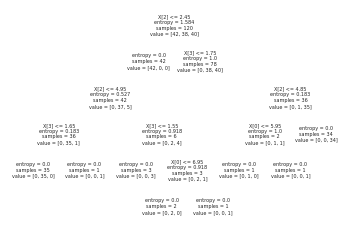

In [ ]:
from sklearn import tree
tree.plot_tree(pred_tree)

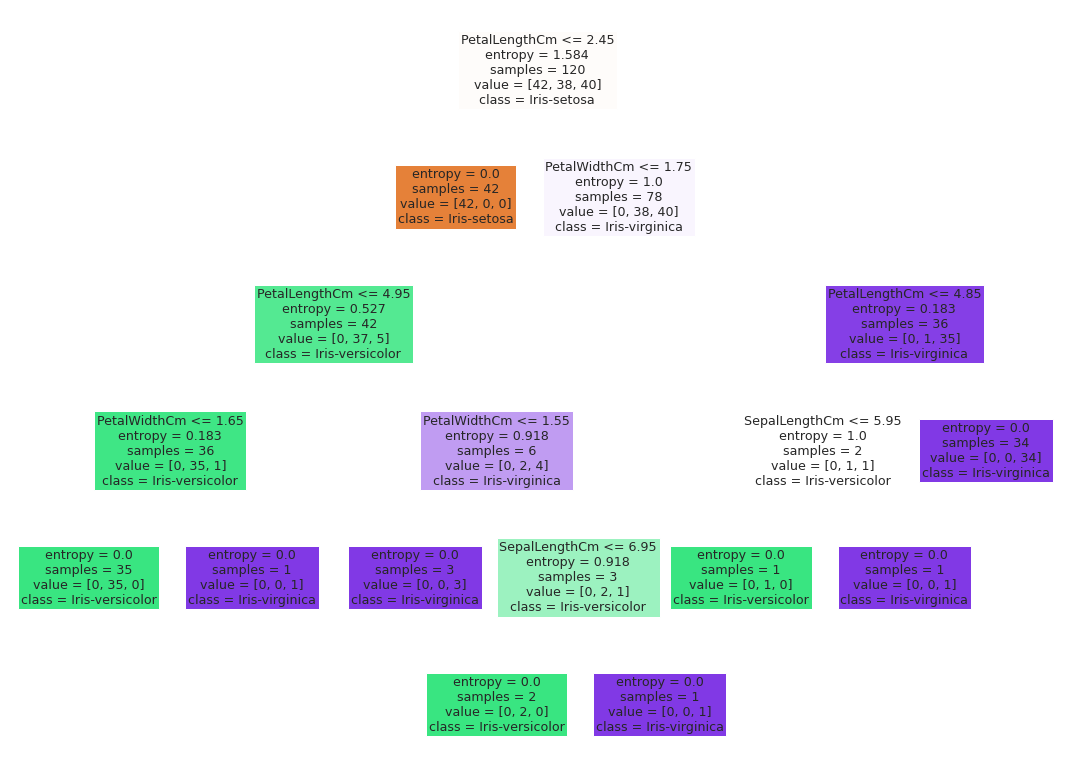

In [ ]:
features = data_set.columns[:-1]
classes =data_set['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(pred_tree, feature_names=features, class_names=classes, filled=True)
plt.show()

## **Thank You :)**